<a href="https://colab.research.google.com/github/yashfirkedata/CV-Plant-Seedling-Classification/blob/main/CV_Plant_Seedling_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plant Seedlings Classification** 🌱

In [1]:
!pip install split-folders

### **Performing train test split**

In [2]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Datasets/NonsegmentedV2.zip'
extract_dir = '/content/Plant Seedlings'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")


Extraction complete.


In [3]:
import splitfolders

input_folder = '/content/Plant Seedlings'
output_folder = '/content/dataset'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .0, .2))

Copying files: 5539 files [00:11, 482.11 files/s]


In [4]:
import glob

train_length = 0
test_length = 0

for name in glob.glob('/content/dataset/train/*'):
  train_length += len(glob.glob(name+'/*.png'))

for name in glob.glob('/content/dataset/test/*'):
  test_length += len(glob.glob(name+'/*.png'))

print(train_length,test_length)

4426 1113


# **Data Preprocessing:**

In [5]:
batch_size = 32
img_height = 120
img_width = 120

In [6]:
data_dir_train = '/content/dataset/train'
data_dir_test = '/content/dataset/test'

In [7]:
# creating train dataset
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               validation_split=0.2,
                                                               subset="training", seed=42,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 4426 files belonging to 12 classes.
Using 3541 files for training.


In [8]:
# creating validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             validation_split=0.2,
                                                             subset="validation", seed=42,
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 4426 files belonging to 12 classes.
Using 885 files for validation.


In [9]:
# listing all classes in out dataset
import os
labels = sorted(os.listdir(data_dir_train))
print(labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [10]:
count = []
for i in labels:
  count.append(len(os.listdir(os.path.join(data_dir_train,i))))

In [11]:
count # This counted occurance of each class

[247, 361, 268, 570, 202, 430, 609, 205, 485, 219, 460, 370]

# **Data Visualization:**

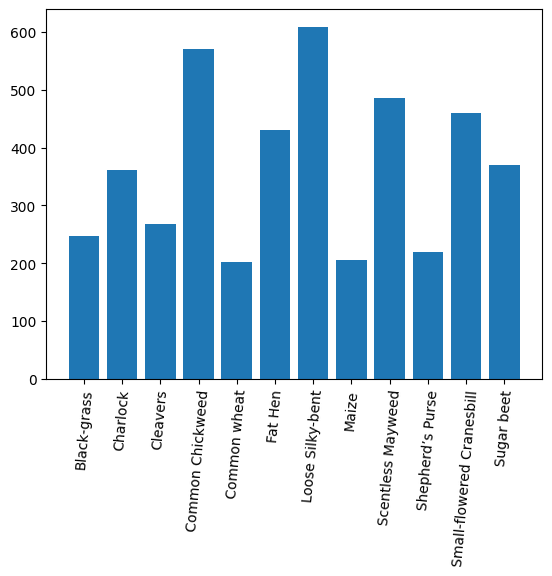

In [ ]:
# creating plot for distribution of images in each class
import matplotlib.pyplot as plt

plt.bar(labels, count)
plt.xticks(rotation = 85)
plt.show()

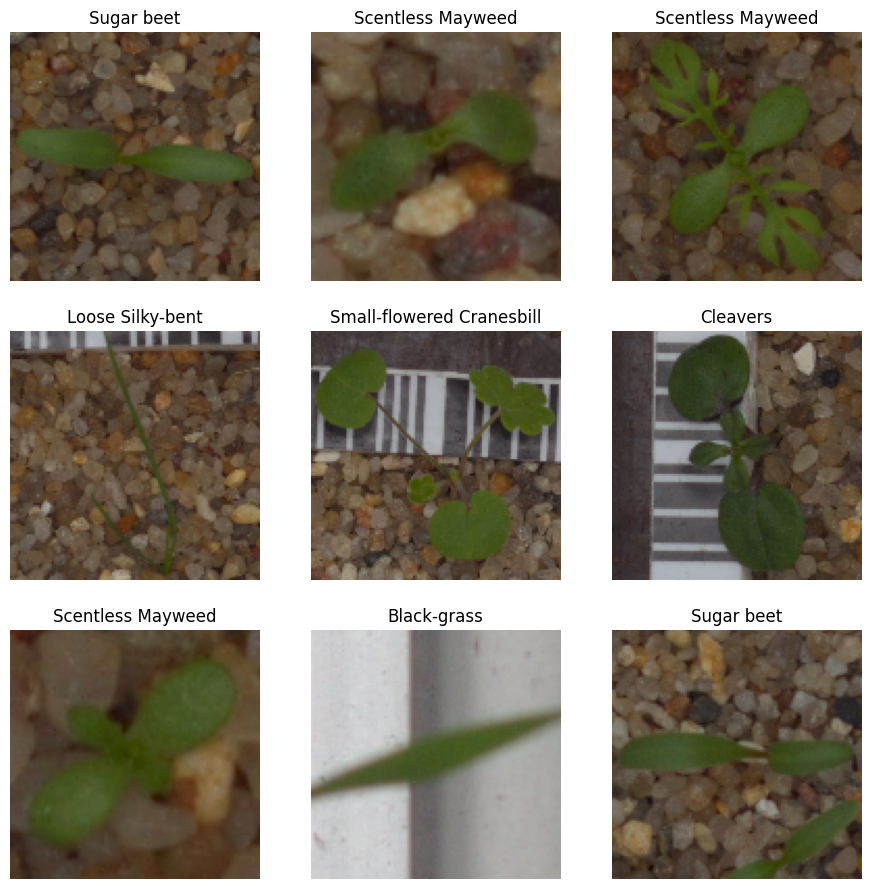

In [ ]:
# visualizing few samples
plt.figure(figsize=(11, 11))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

# **Model Training**

## **Model 1**

> Creating a CNN model, which can accurately detect 12 classes present in the dataset.

>Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1).

>The RGB channel values are in the [0, 255] range.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# specifying image dimensions with RGB channel
input_shape = (120,120,3)
# storing number of classes of plant seedlings in a variable
num_classes = 12

# creating layers for the first model using conv2D
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
# using batch normalization
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 120, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 activation (Activation)     (None, 120, 120, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 120, 120, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 118, 118, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 118, 118, 32)      0         
                                                        

In [ ]:
epochs = 20
batch_size = 32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
111/111 [==============================] - 44s 282ms/step - loss: 3.2798 - accuracy: 0.4713 - val_loss: 6.2457 - val_accuracy: 0.0395
Epoch 2/20
111/111 [==============================] - 39s 341ms/step - loss: 0.8744 - accuracy: 0.7379 - val_loss: 15.0091 - val_accuracy: 0.1458
Epoch 3/20
111/111 [==============================] - 30s 255ms/step - loss: 0.5830 - accuracy: 0.8139 - val_loss: 14.6929 - val_accuracy: 0.1458
Epoch 4/20
111/111 [==============================] - 30s 260ms/step - loss: 0.4228 - accuracy: 0.8605 - val_loss: 5.2569 - val_accuracy: 0.2418
Epoch 5/20
111/111 [==============================] - 34s 292ms/step - loss: 0.2806 - accuracy: 0.9096 - val_loss: 0.6849 - val_accuracy: 0.7887
Epoch 6/20
111/111 [==============================] - 33s 285ms/step - loss: 0.2277 - accuracy: 0.9212 - val_loss: 0.4373 - val_accuracy: 0.8825
Epoch 7/20
111/111 [==============================] - 31s 268ms/step - loss: 0.1233 - accuracy: 0.9624 - val_loss: 0.4520 - val_

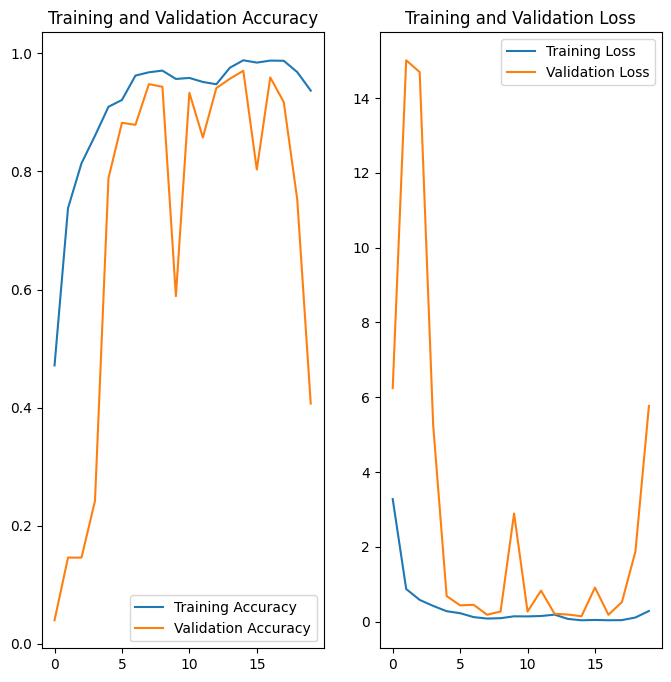

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations:**

1. We can see huge differences between Training accuracy and Validation Accuracy => Overfitting.
2. The validation loss as observed is very high.This could also be indicative of some Overfitting in the model.
3. We could add some Dropout layers and remove the BatchNormalization layers to avoid overfitting to some extent.



## **Model 2:**

> Removing Batch Normalization for this layer and adding dropouts after every hidden layer to avoid overfitting

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

input_shape = (120,120,3)
num_classes = 12

model2 = Sequential()
# adding layers for normalizing the images between 0 and 1
model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(32, kernel_size=(3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.20))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [ ]:
opt = Adam(0.001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# specifying the format in which model needs to be saved
# This will be used to extract the main best model in the future.
model_name = 'Seed2' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, save_weights_only=False,
                             mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
epochs = 50
batch_size = 32
history = model2.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

Epoch 1/50
111/111 [==============================] - ETA: 0s - loss: 2.3314 - accuracy: 0.2093
Epoch 1: val_loss improved from inf to 1.73078, saving model to Seed2/model-00001-2.33142-1.73078-.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


111/111 [==============================] - 44s 343ms/step - loss: 2.3314 - accuracy: 0.2093 - val_loss: 1.7308 - val_accuracy: 0.3898
Epoch 2/50
111/111 [==============================] - ETA: 0s - loss: 1.5961 - accuracy: 0.4527
Epoch 2: val_loss improved from 1.73078 to 1.25907, saving model to Seed2/model-00002-1.59615-1.25907-.h5
111/111 [==============================] - 34s 286ms/step - loss: 1.5961 - accuracy: 0.4527 - val_loss: 1.2591 - val_accuracy: 0.5684
Epoch 3/50
111/111 [==============================] - ETA: 0s - loss: 1.2025 - accuracy: 0.5885
Epoch 3: val_loss improved from 1.25907 to 0.87590, saving model to Seed2/model-00003-1.20246-0.87590-.h5
111/111 [==============================] - 34s 292ms/step - loss: 1.2025 - accuracy: 0.5885 - val_loss: 0.8759 - val_accuracy: 0.7299
Epoch 4/50
111/111 [==============================] - ETA: 0s - loss: 0.9289 - accuracy: 0.6814
Epoch 4: val_loss improved from 0.87590 to 0.72607, saving model to Seed2/model-00004-0.92885-0.72

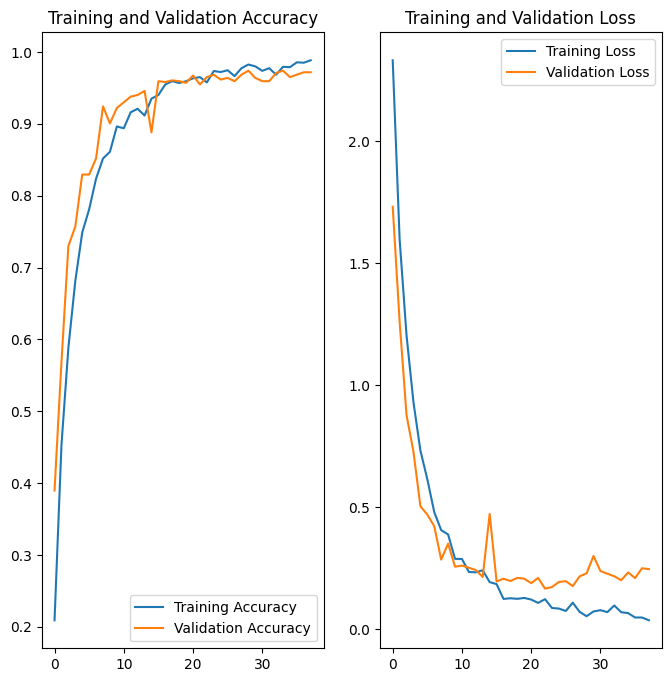

In [ ]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations:**

1. The model is performing better than the previous model since there is comparatively less overfitting.


```
Epoch 23/50
110/111 [============================>.] - ETA: 0s - loss: 0.1227 - accuracy: 0.9577
Epoch 23: val_loss improved from 0.18801 to 0.16561, saving model to Seed2/model-00023-0.12239-0.16561-.h5
111/111 [==============================] - 29s 248ms/step - loss: 0.1224 - accuracy: 0.9576 - val_loss: 0.1656 - val_accuracy: 0.9650
```


2. Training accuracy of 95.76% and validation accuracy of 96.50% when the val_loss was minimum.
3. Early Stopping used.
4. Validation loss significantly improved and alot less overfitting.
5. Validation loss = 0.1651

## **Model 3:**

> Using data augmentation to increase data.


In [ ]:
input_shape = (120,120,3)
num_classes = 12

model_aug = Sequential()
model_aug.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))

model_aug.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_aug.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
model_aug.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(32, kernel_size=(3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Dropout(0.20))

model_aug.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(64, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.20))

model_aug.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(128, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.20))

model_aug.add(Flatten())
model_aug.add(Dense(512))
model_aug.add(Activation('relu'))
model_aug.add(Dropout(0.20))
model_aug.add(Dense(num_classes))
model_aug.add(Activation('softmax'))

In [ ]:
opt = Adam(0.001)
model_aug.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_name = 'Seed3' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
epochs = 100
batch_size = 32
history = model_aug.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
110/111 [============================>.] - ETA: 0s - loss: 2.4259 - accuracy: 0.1389
Epoch 1: val_loss improved from inf to 2.41362, saving model to Seed3/model-00001-2.42555-2.41362-.h5
111/111 [==============================] - 35s 243ms/step - loss: 2.4255 - accuracy: 0.1384 - val_loss: 2.4136 - val_accuracy: 0.1243
Epoch 2/100
111/111 [==============================] - ETA: 0s - loss: 1.8940 - accuracy: 0.3516
Epoch 2: val_loss improved from 2.41362 to 1.74851, saving model to Seed3/model-00002-1.89395-1.74851-.h5
111/111 [==============================] - 32s 280ms/step - loss: 1.8940 - accuracy: 0.3516 - val_loss: 1.7485 - val_accuracy: 0.3548
Epoch 3/100
110/111 [============================>.] - ETA: 0s - loss: 1.3484 - accuracy: 0.5330
Epoch 3: val_loss improved from 1.74851 to 1.08758, saving model to Seed3/model-00003-1.34881-1.08758-.h5
111/111 [==============================] - 32s 280ms/step - loss: 1.3488 - accuracy: 0.5326 - val_loss: 1.0876 - val_accuracy: 

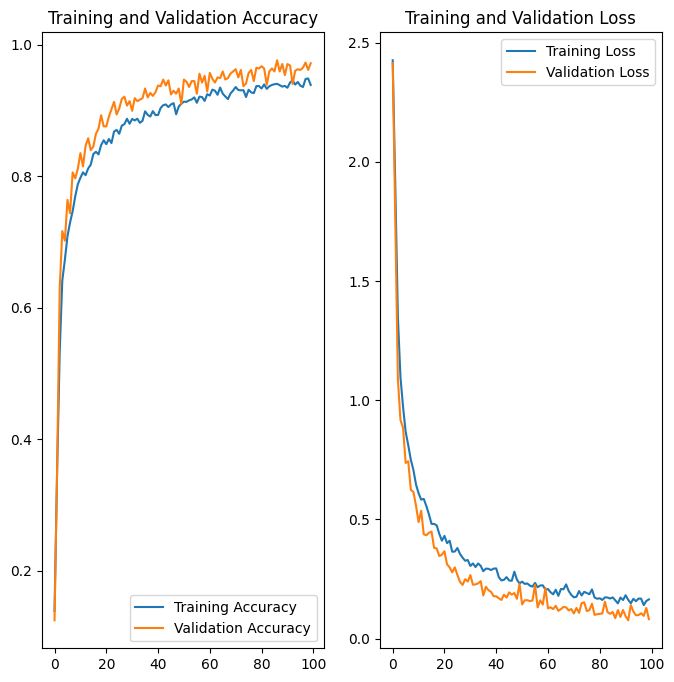

In [ ]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations:**

1. Including Data Augmentation has improved the model accuracy to 94% and also handled overfitting to great extent.

```
Epoch 92/100
111/111 [==============================] - ETA: 0s - loss: 0.1631 - accuracy: 0.9424
Epoch 92: val_loss improved from 0.08615 to 0.07721, saving model to Seed3/model-00092-0.16305-0.07721-.h5
111/111 [==============================] - 33s 282ms/step - loss: 0.1631 - accuracy: 0.9424 - val_loss: 0.0772 - val_accuracy: 0.9684
```


2. Data Augmentation has improved the model performance.
3. Accuracy = 94.24% and Validation Accuracy = 96.84%
3. Validation loss have improved from 0.1651 to 0.07721

## **Model 4:**

> Checking for Data Imbalance and fixing model according to it.

In [ ]:
train_path = "/content/dataset/train/"
test_path = "/content/dataset/test/"

In [ ]:
### distibution of classes for each category of data
### It can be seen that data has imbalances in the class distribution
import pathlib
for i in labels:
    directory =train_path + i + '/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.png')))
    print(f'{i} has {length} samples.')

Black-grass has 247 samples.
Charlock has 361 samples.
Cleavers has 268 samples.
Common Chickweed has 570 samples.
Common wheat has 202 samples.
Fat Hen has 430 samples.
Loose Silky-bent has 609 samples.
Maize has 205 samples.
Scentless Mayweed has 485 samples.
Shepherd’s Purse has 219 samples.
Small-flowered Cranesbill has 460 samples.
Sugar beet has 370 samples.


In [ ]:
# You can use a python package known as Augmentor to add more samples across all classes
# so that none of the classes have very few samples.
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset=train_path

import Augmentor
for i in labels:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 247 image(s) found.
Output directory set to /content/dataset/train/Black-grass/output.

Processing <PIL.Image.Image image mode=RGB size=2474x2474 at 0x7F43FE9C78E0>: 100%|██████████| 500/500 [02:28<00:00,  3.37 Samples/s]


Initialised with 361 image(s) found.
Output directory set to /content/dataset/train/Charlock/output.

Processing <PIL.Image.Image image mode=RGB size=185x185 at 0x7F43FE71A620>: 100%|██████████| 500/500 [01:02<00:00,  7.99 Samples/s]


Initialised with 268 image(s) found.
Output directory set to /content/dataset/train/Cleavers/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=305x305 at 0x7F43FE83FBB0>: 100%|██████████| 500/500 [00:30<00:00, 16.43 Samples/s]


Initialised with 570 image(s) found.
Output directory set to /content/dataset/train/Common Chickweed/output.

Processing <PIL.Image.Image image mode=RGB size=475x475 at 0x7F43FE9C78B0>: 100%|██████████| 500/500 [00:21<00:00, 23.45 Samples/s]


Initialised with 202 image(s) found.
Output directory set to /content/dataset/train/Common wheat/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=66x66 at 0x7F43FE718DF0>: 100%|██████████| 500/500 [01:08<00:00,  7.29 Samples/s]


Initialised with 430 image(s) found.
Output directory set to /content/dataset/train/Fat Hen/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=311x311 at 0x7F446814E7A0>: 100%|██████████| 500/500 [00:34<00:00, 14.53 Samples/s]


Initialised with 609 image(s) found.
Output directory set to /content/dataset/train/Loose Silky-bent/output.

Processing <PIL.Image.Image image mode=RGB size=128x128 at 0x7F43FE99C3A0>: 100%|██████████| 500/500 [01:11<00:00,  7.02 Samples/s]


Initialised with 205 image(s) found.
Output directory set to /content/dataset/train/Maize/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=71x71 at 0x7F44704B6560>: 100%|██████████| 500/500 [01:43<00:00,  4.83 Samples/s]


Initialised with 485 image(s) found.
Output directory set to /content/dataset/train/Scentless Mayweed/output.

Processing <PIL.Image.Image image mode=RGB size=417x417 at 0x7F445056CE50>: 100%|██████████| 500/500 [00:26<00:00, 18.53 Samples/s]


Initialised with 219 image(s) found.
Output directory set to /content/dataset/train/Shepherd’s Purse/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=111x111 at 0x7F43FE99DFC0>: 100%|██████████| 500/500 [00:33<00:00, 14.76 Samples/s]


Initialised with 460 image(s) found.
Output directory set to /content/dataset/train/Small-flowered Cranesbill/output.

Processing <PIL.Image.Image image mode=RGB size=199x199 at 0x7F43FE87F670>: 100%|██████████| 500/500 [00:39<00:00, 12.57 Samples/s]


Initialised with 370 image(s) found.
Output directory set to /content/dataset/train/Sugar beet/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1286x1286 at 0x7F446BF18D90>: 100%|██████████| 500/500 [01:41<00:00,  4.92 Samples/s]


In [ ]:
### Distribution of classes after augmentation
for i in labels:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.png')))
    length_out=len(list(class_directory_out.glob('*.png')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

Black-grass has 747 samples.
Charlock has 861 samples.
Cleavers has 768 samples.
Common Chickweed has 1070 samples.
Common wheat has 702 samples.
Fat Hen has 930 samples.
Loose Silky-bent has 1109 samples.
Maize has 705 samples.
Scentless Mayweed has 985 samples.
Shepherd’s Purse has 719 samples.
Small-flowered Cranesbill has 960 samples.
Sugar beet has 870 samples.


In [ ]:
batch_size = 32
img_height = 120
img_width = 120

In [ ]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10426 files belonging to 12 classes.
Using 8341 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10426 files belonging to 12 classes.
Using 2085 files for validation.


In [ ]:
input_shape = (120,120,3)
num_classes = 12

model4 = Sequential()
model4.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))
model4.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(32, kernel_size=(3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.10))

model4.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.10))

model4.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(128, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.10))

model4.add(Flatten())
model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(Dropout(0.25))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [ ]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_name = 'Seed4' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=5, verbose=1, mode='max', min_lr=1e-5)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, early_stopping, lr_reduce]

In [ ]:
### training the model
epochs = 100
batch_size = 32
history = model4.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

Epoch 1/100
261/261 [==============================] - ETA: 0s - loss: 1.6978 - accuracy: 0.3900
Epoch 1: val_loss improved from inf to 0.99953, saving model to Seed4/model-00001-1.69778-0.99953-.h5
261/261 [==============================] - 74s 266ms/step - loss: 1.6978 - accuracy: 0.3900 - val_loss: 0.9995 - val_accuracy: 0.6398 - lr: 0.0010
Epoch 2/100
260/261 [============================>.] - ETA: 0s - loss: 0.9204 - accuracy: 0.6731
Epoch 2: val_loss improved from 0.99953 to 0.68999, saving model to Seed4/model-00002-0.92006-0.68999-.h5
261/261 [==============================] - 71s 262ms/step - loss: 0.9201 - accuracy: 0.6733 - val_loss: 0.6900 - val_accuracy: 0.7506 - lr: 0.0010
Epoch 3/100
261/261 [==============================] - ETA: 0s - loss: 0.6234 - accuracy: 0.7789
Epoch 3: val_loss improved from 0.68999 to 0.47908, saving model to Seed4/model-00003-0.62342-0.47908-.h5
261/261 [==============================] - 78s 291ms/step - loss: 0.6234 - accuracy: 0.7789 - val_los

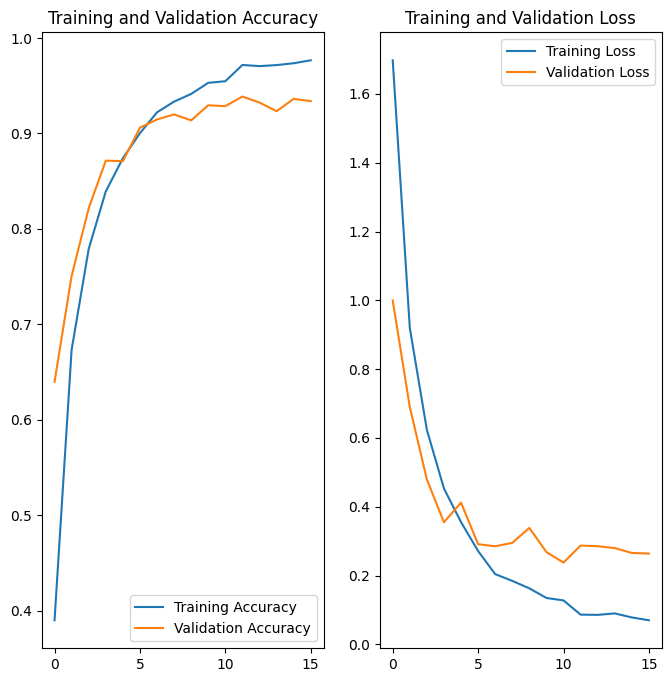

In [ ]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation:**

1. Accuracy on training data has increased to around 95.5% by using Augmentor library of Python.


```
Epoch 11/100
261/261 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9547
Epoch 11: val_loss improved from 0.26805 to 0.23763, saving model to Seed4/model-00011-0.12761-0.23763-.h5
261/261 [==============================] - 71s 265ms/step - loss: 0.1276 - accuracy: 0.9547 - val_loss: 0.2376 - val_accuracy: 0.9285 - lr: 0.0010
```


2. Model is much less overfitting compared to previous models
3. The above model can be further improved by tuning the hyperparameters.
4. Validation loss is also less = 0.2376

### **Conclusion:**

**Model 3:**

- Epoch 92:
  - Loss: 0.1631
  - Accuracy: 0.9424
  - Validation Loss: 0.0772
  - Validation Accuracy: 0.9684

  The validation loss improved from 0.08615 to 0.07721 during this epoch.

**Model 4:**

- Epoch 11:
  - Loss: 0.1276
  - Accuracy: 0.9547
  - Validation Loss: 0.2376
  - Validation Accuracy: 0.9285

  The validation loss improved from 0.26805 to 0.23763 during this epoch.

Comparing the two models, Model 3 has a higher validation accuracy (0.9684) compared to Model 4 (0.9285) at the end of training. Additionally, Model 3 achieves a lower validation loss (0.0772) compared to Model 4 (0.2376). This indicates that Model 3 performs better in terms of both accuracy and loss on the validation set.

Therefore, based on these results, it can be concluded that Model 3 is the better performing model and should be selected over Model 4 for the plant seedlings classification task.


**Selected Model for Deployment:**

`Seed3/model-00092-0.16305-0.07721-.h5`

This model will be used for inference in our plant seedlings classification task.




# **Model Testing**

In [64]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/drive/MyDrive/model-00092-0.16305-0.07721-.h5')

# function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(120, 120))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# function to make predictions
def predict_image(image_path, model):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    return prediction

test_image_path = '/content/dataset/test/Charlock/101.png'

prediction = predict_image(test_image_path, model)

class_labels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']

predicted_class_index = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)


1/1 [==============================] - 0s 164ms/step
Predicted class label: Charlock


Seems like our model is working fine

In [ ]:
import os
from sklearn.metrics import classification_report, confusion_matrix

class_labels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']

# variables to store true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over each class folder and each images
for i, class_label in enumerate(class_labels):

    class_folder_path = os.path.join('/content/dataset/test/', class_label)

    image_files = os.listdir(class_folder_path)

    for image_file in image_files:
        # Load the image
        img_path = os.path.join(class_folder_path, image_file)
        img = image.load_img(img_path, target_size=(120, 120))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Preprocess the image and making predictions
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = class_labels[predicted_class_index]

        # Store true and predicted labels in the list I created
        true_labels.append(class_label)
        predicted_labels.append(predicted_class_label)



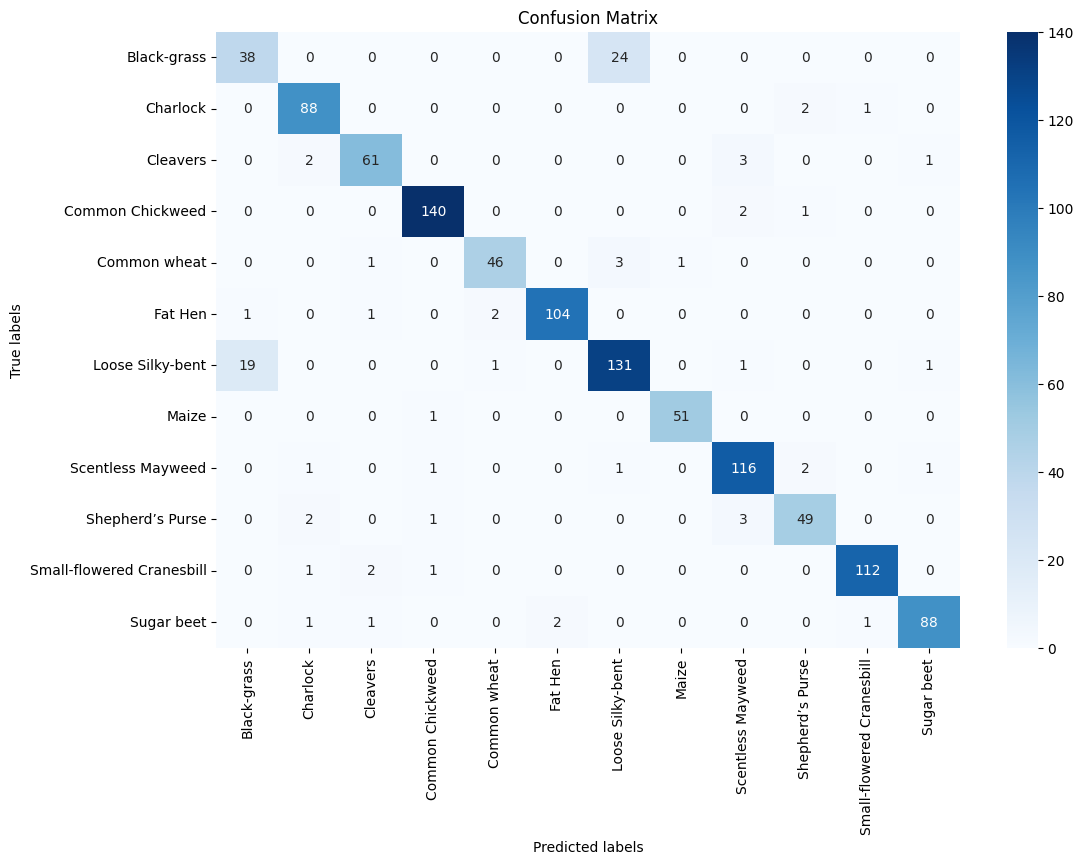


Classification Report:
                           precision    recall  f1-score   support

              Black-grass       0.66      0.61      0.63        62
                 Charlock       0.93      0.97      0.95        91
                 Cleavers       0.92      0.91      0.92        67
         Common Chickweed       0.97      0.98      0.98       143
             Common wheat       0.94      0.90      0.92        51
                  Fat Hen       0.98      0.96      0.97       108
         Loose Silky-bent       0.82      0.86      0.84       153
                    Maize       0.98      0.98      0.98        52
        Scentless Mayweed       0.93      0.95      0.94       122
         Shepherd’s Purse       0.91      0.89      0.90        55
Small-flowered Cranesbill       0.98      0.97      0.97       116
               Sugar beet       0.97      0.95      0.96        93

                 accuracy                           0.92      1113
                macro avg       0.92

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting confusion matrx
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))


**Observation:**

* **Good performance for some classes:** The model shows good performance on classes like "Charlock", "Common Chickweed", "Fat Hen", "Scentless Mayweed", "Small-flowered Cranesbill", and "Sugar beet", as they have high diagonal values.


* **Room for improvement for other classes:** The model has a lower accuracy for classes like "Loose Silky-bent", and "Shepherd's Purse".


* **Common misclassifications:** "Black-grass" is commonly being misclassified. This can be fixed with add more samples of the class.

1/1 [==============================] - 0s 50ms/step


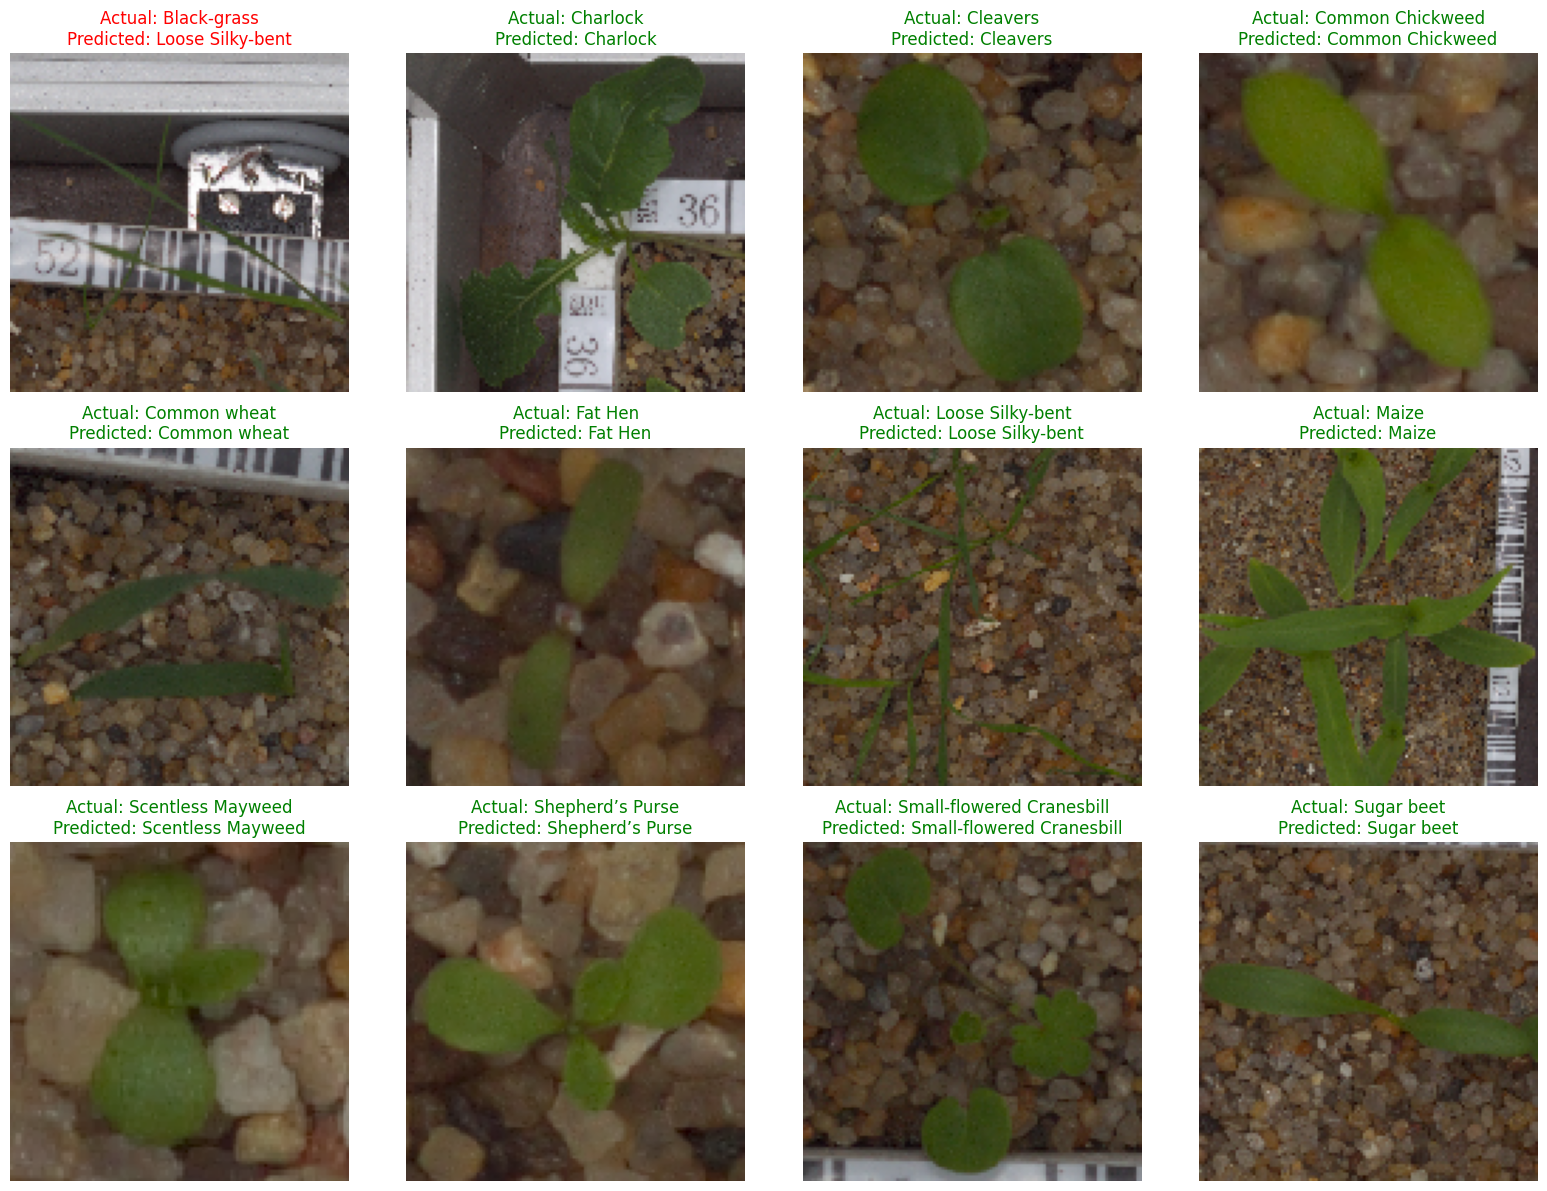

In [75]:
import random

true_labels = []
predicted_labels = []
images = []

for class_label in class_labels:
    class_folder_path = os.path.join('/content/dataset/test/', class_label)

    image_files = os.listdir(class_folder_path)

    selected_image_file = random.choice(image_files)

    img_path = os.path.join(class_folder_path, selected_image_file)
    img = image.load_img(img_path, target_size=(120, 120))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    true_labels.append(class_label)
    predicted_labels.append(predicted_class_label)
    images.append(img)

# Visualizing the images, actual labels, and predicted labels for each sample/class.
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
axs = axs.ravel()

for i in range(len(images)):
    axs[i].imshow(images[i])
    if true_labels[i] == predicted_labels[i]:
        axs[i].set_title(f"Actual: {true_labels[i]}\nPredicted: {predicted_labels[i]}", color='green')
    else:
        axs[i].set_title(f"Actual: {true_labels[i]}\nPredicted: {predicted_labels[i]}", color='red')
    axs[i].axis('off')

plt.tight_layout()
plt.show()